In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score



In [85]:
# Read the XGBOOST pickle file and load it into the 'train' DataFrame
merged_df_train = pd.read_pickle('merged_df_train.pkl')
df_train = pd.DataFrame(merged_df_train)

# Read the XGBOOST pickle file and load it into the 'test' DataFrame
merged_df_test = pd.read_pickle('merged_df_test.pkl')
df_test = pd.DataFrame(merged_df_test)

In [86]:
merged_df_train

,V264,addr2_target_encoded,V283,C1,C5,R_emaildomain_bin_google,M4_nan,V30,V156,D3,...,card6_debit,V142,V47,V80,TransactionAmt_decimal,P_emaildomain_suffix_us,D15,isFraud,isFraud_xgb,isFraud_xgb_proba
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,13.0,...,0,NaN,NaN,0.0,500,0,0.0,0,0,0.049274
2987001,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,0,NaN,1.0,0.0,0,0,0.0,0,0,0.109343
2987002,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,1,NaN,1.0,0.0,0,0,315.0,0,0,0.085206
2987003,NaN,0.024207,0.0,2.0,0.0,0,0,0.0,NaN,0.0,...,1,NaN,1.0,0.0,0,0,111.0,0,0,0.087324
2987004,0.0,0.024207,1.0,1.0,0.0,0,1,NaN,0.0,NaN,...,0,0.0,NaN,NaN,0,0,NaN,0,0,0.017489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,NaN,0.024207,0.0,3.0,1.0,0,1,1.0,NaN,96.0,...,1,NaN,1.0,0.0,950,0,348.0,0,0,0.090004
3429901,0.0,NaN,1.0,1.0,0.0,0,0,NaN,NaN,NaN,...,1,NaN,NaN,NaN,658,0,NaN,0,0,0.104147
3429902,NaN,0.024207,0.0,83.0,126.0,0,1,4.0,NaN,4.0,...,1,NaN,NaN,0.0,949,0,138.0,0,0,0.000944


[[422402   4940]
 [  5126  10437]]


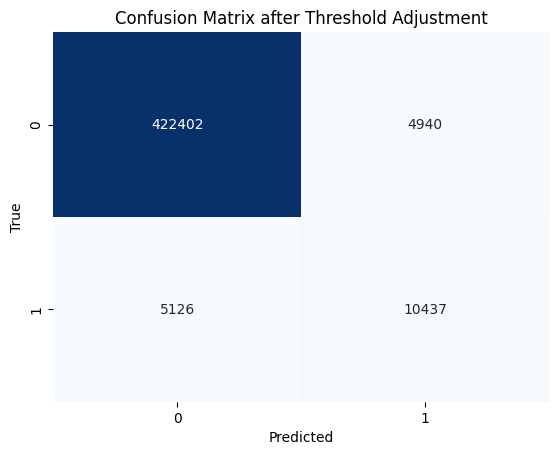

In [87]:
# Compare the predicted labels from a model with the true labels
# Parameter true values and predicted values
confusion = confusion_matrix(df_train['isFraud'], df_train['isFraud_xgb'])
print(confusion)
# Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix after Threshold Adjustment')
plt.show()


#XGBOOST TRAIN

Threshold: 0, TPR: 1.0, FPR: 1.0
Threshold: 0.1, TPR: 0.9306688941720748, FPR: 0.18329347454731806
Threshold: 0.2, TPR: 0.8527276232088928, FPR: 0.0741116014807812
Threshold: 0.3, TPR: 0.788986699222515, FPR: 0.03752263994645975
Threshold: 0.4, TPR: 0.7316070166420356, FPR: 0.02072578871255341
Threshold: 0.5, TPR: 0.6706290560945833, FPR: 0.011559827959807367
Threshold: 0.6, TPR: 0.6124140589860567, FPR: 0.006423426669973932
Threshold: 0.7, TPR: 0.5492514296729423, FPR: 0.00352176944929354
Threshold: 0.8, TPR: 0.47908500931696973, FPR: 0.001829916085945215
Threshold: 0.9, TPR: 0.38308809355522716, FPR: 0.0007324344436072279


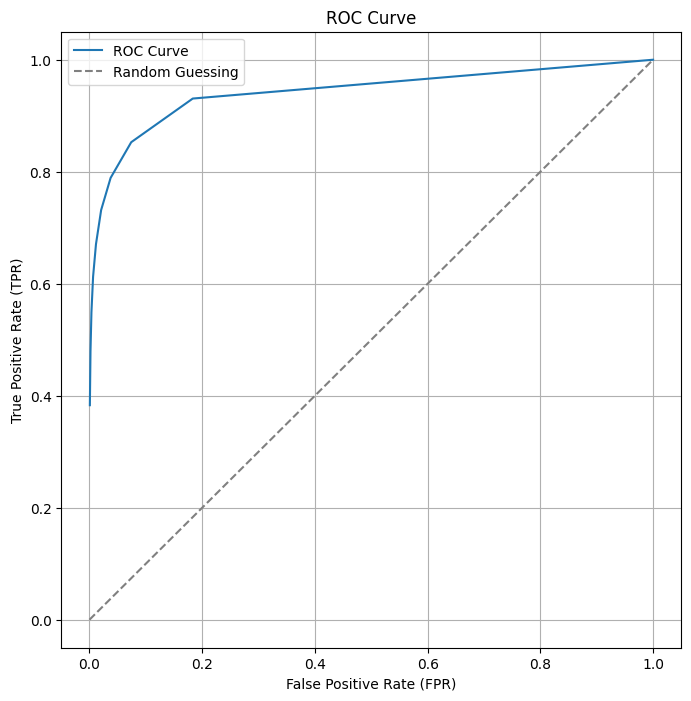

In [88]:
conf_matrix = np.array(confusion)

# Thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize lists to store TPR and FPR for each threshold
tpr_list = []
fpr_list = []

for threshold in thresholds:
    # You would replace this part with your actual model predictions
    predicted_positive = (df_train['isFraud_xgb_proba'] >= threshold).astype(int)

    # Confusion matrix for the current threshold
    conf_matrix_threshold = confusion_matrix(df_train['isFraud'], predicted_positive)

    # Calculate True Positive Rate and False Positive Rate for the current threshold
    TPR = conf_matrix_threshold[1, 1] / (conf_matrix_threshold[1, 1] + conf_matrix_threshold[1, 0])
    FPR = conf_matrix_threshold[0, 1] / (conf_matrix_threshold[0, 0] + conf_matrix_threshold[0, 1])

    # Append TPR and FPR to the lists
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Print the results
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold}, TPR: {tpr_list[i]}, FPR: {fpr_list[i]}")

# Plot TPR vs. FPR
tpr_list = np.array(tpr_list)
fpr_list = np.array(fpr_list)

optimal_threshold_index = np.argmax(tpr_list - fpr_list)
optimal_threshold = thresholds[optimal_threshold_index]

# Plot TPR vs. FPR
plt.figure(figsize=(8, 8))
plt.plot(fpr_list, tpr_list, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Labeling and customization
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()




In [89]:
optimal_threshold = .18

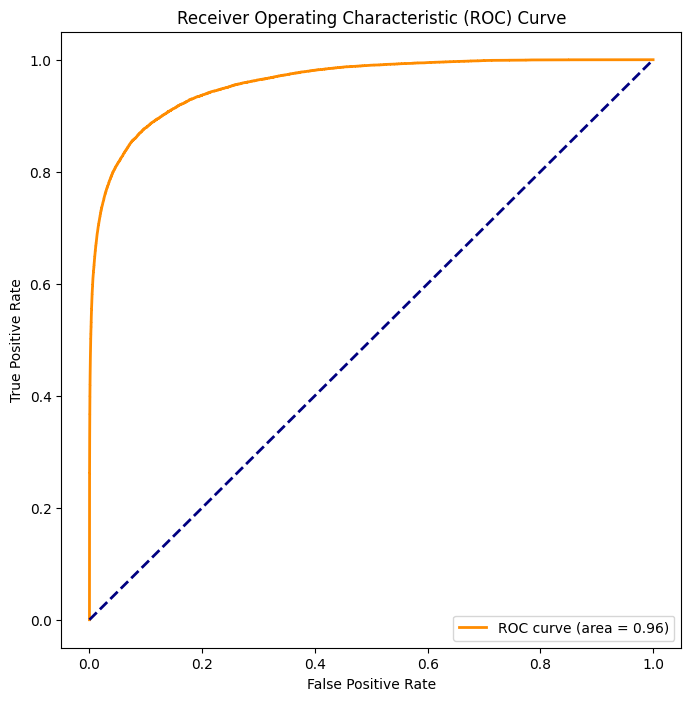

optimal_threshold_index:  13047
Optimal Threshold: 0.18
AUC Score: 0.8898

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    427342
           1       0.27      0.87      0.41     15563

    accuracy                           0.91    442905
   macro avg       0.63      0.89      0.68    442905
weighted avg       0.97      0.91      0.93    442905

[[0.91353529 0.08646471]
 [0.1339716  0.8660284 ]]
[[390392  36950]
 [  2085  13478]]


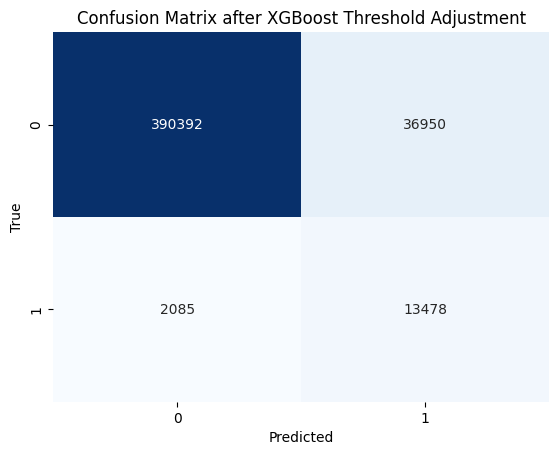

In [90]:
# 'isFraud' is the column with actual labels
# 'isFraud_xgb_proba' is the column with predicted probabilities

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df_train['isFraud'], df_train['isFraud_xgb_proba'])

# Calculate AUC-ROC
roc_auc = roc_auc_score(df_train['isFraud'], df_train['isFraud_xgb_proba'])

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the optimal threshold
# np.argmax() -  returns the index of the maximum value in an array
# find the index of the threshold where the ROC curve is closest to the upper left corner (0, 1), which is considered an optimal point for a binary classification model. 
optimal_threshold_index = np.argmax(tpr - fpr)
#thresholds[optimal_threshold_index]
print("optimal_threshold_index: ", optimal_threshold_index)

# This threshold is chosen as the optimal threshold for making predictions based on the ROC curve analysis
print('Optimal Threshold:', optimal_threshold)

df_train['isFraud_xgb_adjusted'] = (df_train['isFraud_xgb_proba'] > optimal_threshold).astype(int)

# Calculate AUC directly using roc_auc_score
auc_score = roc_auc_score(df_train['isFraud'], df_train['isFraud_xgb_adjusted'])
print(f'AUC Score: {auc_score:.4f}')
print()
#classification report
print(classification_report(df_train['isFraud'], df_train['isFraud_xgb_adjusted']))

#confusion matrix
print(confusion_matrix(df_train['isFraud'], df_train['isFraud_xgb_adjusted'], normalize='true'))

confusion = confusion_matrix(df_train['isFraud'], df_train['isFraud_xgb_adjusted'])
print(confusion)
# Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix after XGBoost Threshold Adjustment')
plt.show()


In [91]:
df_train

,V264,addr2_target_encoded,V283,C1,C5,R_emaildomain_bin_google,M4_nan,V30,V156,D3,...,V142,V47,V80,TransactionAmt_decimal,P_emaildomain_suffix_us,D15,isFraud,isFraud_xgb,isFraud_xgb_proba,isFraud_xgb_adjusted
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,13.0,...,NaN,NaN,0.0,500,0,0.0,0,0,0.049274,0
2987001,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,NaN,1.0,0.0,0,0,0.0,0,0,0.109343,0
2987002,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,NaN,1.0,0.0,0,0,315.0,0,0,0.085206,0
2987003,NaN,0.024207,0.0,2.0,0.0,0,0,0.0,NaN,0.0,...,NaN,1.0,0.0,0,0,111.0,0,0,0.087324,0
2987004,0.0,0.024207,1.0,1.0,0.0,0,1,NaN,0.0,NaN,...,0.0,NaN,NaN,0,0,NaN,0,0,0.017489,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,NaN,0.024207,0.0,3.0,1.0,0,1,1.0,NaN,96.0,...,NaN,1.0,0.0,950,0,348.0,0,0,0.090004,0
3429901,0.0,NaN,1.0,1.0,0.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,658,0,NaN,0,0,0.104147,0
3429902,NaN,0.024207,0.0,83.0,126.0,0,1,4.0,NaN,4.0,...,NaN,NaN,0.0,949,0,138.0,0,0,0.000944,0


In [92]:
df_train.drop('isFraud', axis=1, inplace=True)

In [93]:
df_train

,V264,addr2_target_encoded,V283,C1,C5,R_emaildomain_bin_google,M4_nan,V30,V156,D3,...,card6_debit,V142,V47,V80,TransactionAmt_decimal,P_emaildomain_suffix_us,D15,isFraud_xgb,isFraud_xgb_proba,isFraud_xgb_adjusted
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,13.0,...,0,NaN,NaN,0.0,500,0,0.0,0,0.049274,0
2987001,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,0,NaN,1.0,0.0,0,0,0.0,0,0.109343,0
2987002,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,1,NaN,1.0,0.0,0,0,315.0,0,0.085206,0
2987003,NaN,0.024207,0.0,2.0,0.0,0,0,0.0,NaN,0.0,...,1,NaN,1.0,0.0,0,0,111.0,0,0.087324,0
2987004,0.0,0.024207,1.0,1.0,0.0,0,1,NaN,0.0,NaN,...,0,0.0,NaN,NaN,0,0,NaN,0,0.017489,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,NaN,0.024207,0.0,3.0,1.0,0,1,1.0,NaN,96.0,...,1,NaN,1.0,0.0,950,0,348.0,0,0.090004,0
3429901,0.0,NaN,1.0,1.0,0.0,0,0,NaN,NaN,NaN,...,1,NaN,NaN,NaN,658,0,NaN,0,0.104147,0
3429902,NaN,0.024207,0.0,83.0,126.0,0,1,4.0,NaN,4.0,...,1,NaN,NaN,0.0,949,0,138.0,0,0.000944,0


In [94]:
# Read the LGBM pickle file and load it into the 'train' DataFrame
lmerged_df_train = pd.read_pickle('merged_df_train_lgbm.pkl')
ldf_train = pd.DataFrame(lmerged_df_train)

# Read the LGBM pickle file and load it into the 'test' DataFrame
lmerged_df_test = pd.read_pickle('merged_df_test_lgbm.pkl')
ldf_test = pd.DataFrame(lmerged_df_test)

In [95]:
ldf_train

,card1,TransactionAmt,card2_target_encoded,addr_target_encoded,addr1_target_encoded,dist1,D15,id_02,TransactionAmt_decimal,C1,...,V37,V20,V5,V44,V285,V77,V56,isFraud,isFraud_lgbm,isFraud_lgbm_proba
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,13926,68.500,NaN,0.018030,0.018029,19.0,0.0,NaN,500,1.0,...,NaN,1.0,1.0,NaN,0.0,1.0,1.0,0,0,0.099155
2987001,2755,29.000,0.072853,0.024638,0.024637,NaN,0.0,NaN,0,1.0,...,1.0,1.0,NaN,1.0,0.0,1.0,1.0,0,0,0.090482
2987002,4663,59.000,0.023747,0.030797,0.030792,287.0,315.0,NaN,0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.059829
2987003,18132,50.000,0.015023,0.036640,0.036630,NaN,111.0,NaN,0,2.0,...,1.0,1.0,NaN,1.0,10.0,1.0,1.0,0,0,0.014938
2987004,4497,50.000,0.047572,0.033321,0.033321,NaN,NaN,70787.0,0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0.050098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,7508,107.950,0.028380,0.032233,0.032233,10.0,348.0,NaN,950,3.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.018850
3429901,15885,35.658,0.081291,NaN,NaN,NaN,NaN,275527.0,658,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0,0,0.059053
3429902,9992,30.950,0.013495,0.025818,0.025773,4.0,138.0,NaN,949,83.0,...,NaN,1.0,1.0,NaN,5.0,1.0,1.0,0,0,0.005292


In [96]:
fdata = pd.merge(df_train,ldf_train,on='TransactionID')

In [97]:
fdata

,V264_x,addr2_target_encoded,V283_x,C1_x,C5_x,R_emaildomain_bin_google,M4_nan,V30,V156,D3_x,...,V37,V20,V5,V44_y,V285,V77,V56,isFraud,isFraud_lgbm,isFraud_lgbm_proba
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,13.0,...,NaN,1.0,1.0,NaN,0.0,1.0,1.0,0,0,0.099155
2987001,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,1.0,1.0,NaN,1.0,0.0,1.0,1.0,0,0,0.090482
2987002,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.059829
2987003,NaN,0.024207,0.0,2.0,0.0,0,0,0.0,NaN,0.0,...,1.0,1.0,NaN,1.0,10.0,1.0,1.0,0,0,0.014938
2987004,0.0,0.024207,1.0,1.0,0.0,0,1,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0.050098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,NaN,0.024207,0.0,3.0,1.0,0,1,1.0,NaN,96.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.018850
3429901,0.0,NaN,1.0,1.0,0.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0,0,0.059053
3429902,NaN,0.024207,0.0,83.0,126.0,0,1,4.0,NaN,4.0,...,NaN,1.0,1.0,NaN,5.0,1.0,1.0,0,0,0.005292


In [98]:
isFraud_xgb_adjusted_zero = fdata.loc[fdata['isFraud_xgb_adjusted']==0]
isFraud_xgb_adjusted_zero

,V264_x,addr2_target_encoded,V283_x,C1_x,C5_x,R_emaildomain_bin_google,M4_nan,V30,V156,D3_x,...,V37,V20,V5,V44_y,V285,V77,V56,isFraud,isFraud_lgbm,isFraud_lgbm_proba
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,13.0,...,NaN,1.0,1.0,NaN,0.0,1.0,1.0,0,0,0.099155
2987001,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,1.0,1.0,NaN,1.0,0.0,1.0,1.0,0,0,0.090482
2987002,NaN,0.024207,1.0,1.0,0.0,0,0,0.0,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.059829
2987003,NaN,0.024207,0.0,2.0,0.0,0,0,0.0,NaN,0.0,...,1.0,1.0,NaN,1.0,10.0,1.0,1.0,0,0,0.014938
2987004,0.0,0.024207,1.0,1.0,0.0,0,1,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0.050098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,NaN,0.024207,0.0,3.0,1.0,0,1,1.0,NaN,96.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.018850
3429901,0.0,NaN,1.0,1.0,0.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0,0,0.059053
3429902,NaN,0.024207,0.0,83.0,126.0,0,1,4.0,NaN,4.0,...,NaN,1.0,1.0,NaN,5.0,1.0,1.0,0,0,0.005292


In [99]:
# Remove column from xgboost with _x
columns_to_remove = [col for col in isFraud_xgb_adjusted_zero.columns if col.endswith('_x')]
lgbmdata = isFraud_xgb_adjusted_zero.drop(columns=columns_to_remove)

In [100]:
lgbmdata

,addr2_target_encoded,R_emaildomain_bin_google,M4_nan,V30,V156,V67,V198,M5_T,device_name_Trident,ProductCD_R,...,V37,V20,V5,V44_y,V285,V77,V56,isFraud,isFraud_lgbm,isFraud_lgbm_proba
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0.024207,0,0,0.0,NaN,1.0,NaN,0,0,0,...,NaN,1.0,1.0,NaN,0.0,1.0,1.0,0,0,0.099155
2987001,0.024207,0,0,0.0,NaN,1.0,NaN,1,0,0,...,1.0,1.0,NaN,1.0,0.0,1.0,1.0,0,0,0.090482
2987002,0.024207,0,0,0.0,NaN,1.0,NaN,0,0,0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.059829
2987003,0.024207,0,0,0.0,NaN,1.0,NaN,1,0,0,...,1.0,1.0,NaN,1.0,10.0,1.0,1.0,0,0,0.014938
2987004,0.024207,0,1,NaN,0.0,NaN,1.0,0,0,0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0.050098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429900,0.024207,0,1,1.0,NaN,1.0,NaN,0,0,0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.018850
3429901,NaN,0,0,NaN,NaN,0.0,1.0,0,0,0,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0,0,0.059053
3429902,0.024207,0,1,4.0,NaN,1.0,NaN,0,0,0,...,NaN,1.0,1.0,NaN,5.0,1.0,1.0,0,0,0.005292


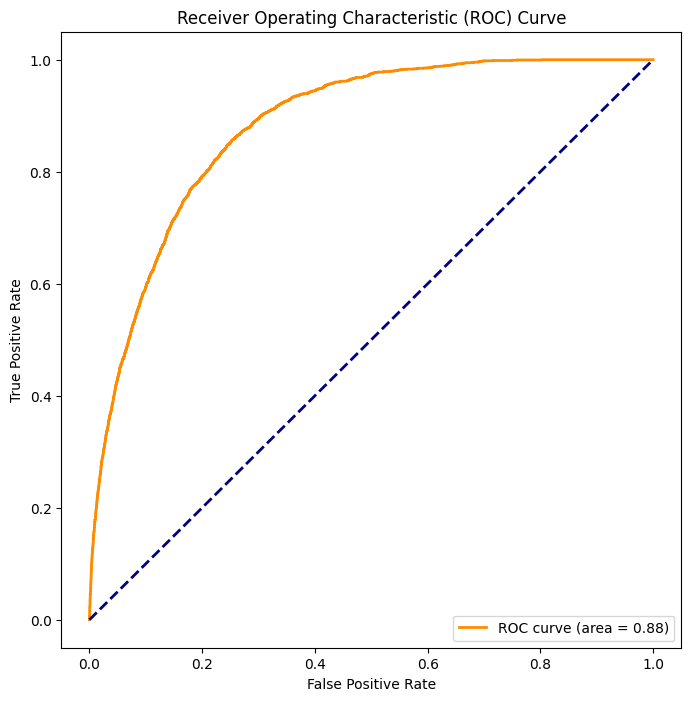

optimal_threshold_index:  5190
Optimal Threshold: 0.18
AUC Score: 0.6606

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    390392
           1       0.05      0.36      0.09      2085

    accuracy                           0.96    392477
   macro avg       0.52      0.66      0.54    392477
weighted avg       0.99      0.96      0.98    392477

[[0.96574725 0.03425275]
 [0.64460432 0.35539568]]
[[377020  13372]
 [  1344    741]]


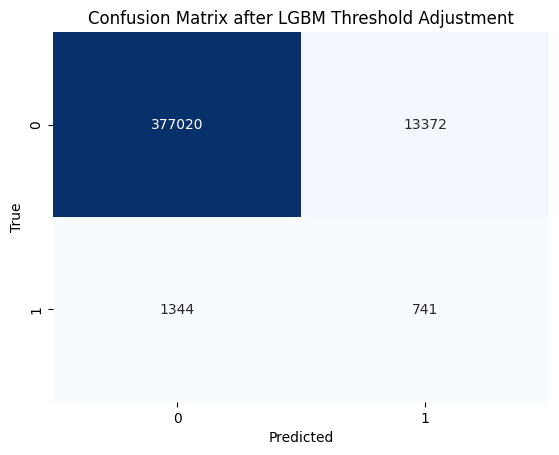

In [101]:
# 'isFraud' is the column with actual labels
# 'isFraud_lgbm_proba' is the column with predicted probabilities

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(lgbmdata['isFraud'], lgbmdata['isFraud_lgbm_proba'])

# Calculate AUC-ROC
roc_auc = roc_auc_score(lgbmdata['isFraud'], lgbmdata['isFraud_lgbm_proba'])

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the optimal threshold
# np.argmax() -  returns the index of the maximum value in an array
# find the index of the threshold where the ROC curve is closest to the upper left corner (0, 1), which is considered an optimal point for a binary classification model. 
optimal_threshold_index = np.argmax(tpr - fpr)
#thresholds[optimal_threshold_index]
print("optimal_threshold_index: ", optimal_threshold_index)
# This threshold is chosen as the optimal threshold for making predictions based on the ROC curve analysis
print('Optimal Threshold:', optimal_threshold)

lgbmdata['isFraud_lgbm_adjusted'] = (lgbmdata['isFraud_lgbm_proba'] > optimal_threshold).astype(int)

# Calculate AUC directly using roc_auc_score
auc_score = roc_auc_score(lgbmdata['isFraud'], lgbmdata['isFraud_lgbm_adjusted'])
print(f'AUC Score: {auc_score:.4f}')
print()
#classification report
print(classification_report(lgbmdata['isFraud'], lgbmdata['isFraud_lgbm_adjusted']))

#confusion matrix
print(confusion_matrix(lgbmdata['isFraud'], lgbmdata['isFraud_lgbm_adjusted'], normalize='true'))

confusion = confusion_matrix(lgbmdata['isFraud'], lgbmdata['isFraud_lgbm_adjusted'])
print(confusion)
# Confusion Matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix after LGBM Threshold Adjustment')
plt.show()


In [60]:
adjusted_1 = lgbmdata.loc[lgbmdata['isFraud_lgbm_adjusted']==1]
adjusted_1

,addr2_target_encoded,R_emaildomain_bin_google,M4_nan,V30,V156,V67,V198,M5_T,device_name_Trident,ProductCD_R,...,V20,V5,V44_y,V285,V77,V56,isFraud,isFraud_lgbm,isFraud_lgbm_proba,isFraud_lgbm_adjusted
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987218,0.024207,0,0,0.0,NaN,1.0,NaN,0,0,0,...,3.0,0.0,1.0,2.0,1.0,1.0,0,1,0.727552,1
2987243,NaN,0,0,0.0,NaN,1.0,1.0,0,0,0,...,1.0,NaN,2.0,0.0,1.0,1.0,1,1,0.663821,1
2987618,NaN,1,0,0.0,NaN,1.0,0.0,0,0,0,...,1.0,NaN,2.0,0.0,1.0,1.0,0,1,0.651919,1
2987637,NaN,0,0,0.0,NaN,1.0,1.0,0,0,0,...,1.0,NaN,2.0,0.0,1.0,1.0,0,1,0.575392,1
2987686,NaN,0,0,0.0,NaN,2.0,1.0,0,0,0,...,1.0,NaN,1.0,0.0,2.0,4.0,0,1,0.651888,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429304,0.024207,0,0,0.0,NaN,1.0,NaN,0,0,0,...,1.0,1.0,NaN,4.0,1.0,1.0,1,1,0.524084,1
3429305,NaN,1,0,NaN,NaN,1.0,NaN,0,0,0,...,NaN,NaN,0.0,0.0,6.0,2.0,0,1,0.641268,1
3429367,0.024207,0,0,1.0,NaN,1.0,NaN,1,0,0,...,0.0,NaN,NaN,1.0,NaN,1.0,1,1,0.586754,1


In [20]:
# 'isFraud_xgb' is the column with original binary predictions
# 'isFraud_xgb_proba' is the column with predicted probabilities

# Adjust the classification threshold
adjusted_threshold = 0.17607044
df_test['isFraud_xgb_adjusted'] = (df_test['isFraud_xgb_proba'] >= adjusted_threshold).astype(int)


print("Threshold: ", adjusted_threshold)
# Calculate AUC directly using roc_auc_score
auc_score = roc_auc_score(df_test['isFraud'], df_test['isFraud_xgb_adjusted'])
print(f'AUC Score: {auc_score:.4f}')
print()
#classification report
print(classification_report(df_test['isFraud'], df_test['isFraud_xgb_adjusted']))

#confusion matrix
print(confusion_matrix(df_test['isFraud'], df_test['isFraud_xgb_adjusted'], normalize='true'))





Threshold:  0.17607044
AUC Score: 0.7928

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    142535
           1       0.21      0.68      0.32      5100

    accuracy                           0.90    147635
   macro avg       0.60      0.79      0.63    147635
weighted avg       0.96      0.90      0.92    147635

[[0.90778405 0.09221595]
 [0.32215686 0.67784314]]
